In [4]:
from pathlib import Path


loc = Path('../tfop/')
files = list(loc.glob('*.csv'))
files

[PosixPath('../tfop/TOI5671.01L-jd20220630_MuSCAT3_i_measurements.csv'),
 PosixPath('../tfop/TOI5671.01L-jd20220630_MuSCAT3_z_measurements.csv'),
 PosixPath('../tfop/TOI5671.01L-jd20220630_MuSCAT3_g_measurements.csv'),
 PosixPath('../tfop/TOI5671.01L-jd20220630_MuSCAT3_r_measurements.csv')]

In [6]:
import pandas as pd

data = {}
for f in files:
    b = f.name.split('_')[-2]
    data[b] = pd.read_csv(f)

In [14]:
df_tess_cpm = pd.read_csv('../data/tess_cpm_s16s23s50.csv')
df_tess_cpm.head()

,time,flux,err
0,2.458739e+06,0.999975,1.023056
1,2.458739e+06,0.994739,1.023056
2,2.458739e+06,1.001697,1.023056
3,2.458739e+06,1.021017,1.023056
4,2.458739e+06,0.996665,1.023056


In [17]:
period = 3.3078672409037155
period_err = 0.00026081271484801327 
t0 = 2458739.7076258925

/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/lightkurve/lightcurve.py:1043: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(-0.1, 0.1)

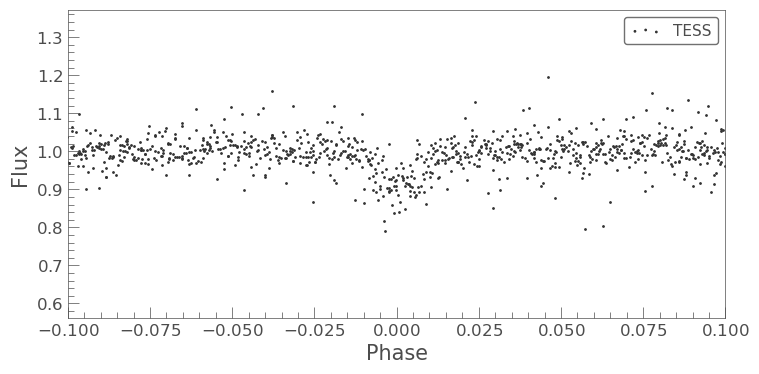

In [53]:
import lightkurve as lk

lc = lk.TessLightCurve(time=df_tess_cpm.time, 
                      flux=df_tess_cpm.flux,
                      flux_err=df_tess_cpm.err
                     )
ax = lc.fold(period, epoch_time=t0, normalize_phase=True).scatter(label='TESS')
ax.set_xlim(-0.1, 0.1)

In [32]:
n = (df['BJD_TDB'].max()-t0)//period
n

309.0

In [34]:
tc = t0+n*period
tc

2459761.8386033317

In [67]:
from aesthetic.plot import savefig, set_style
set_style('science')

/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/lightkurve/lightcurve.py:1043: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


Text(0, 0.5, 'Normalized Flux - Offset')

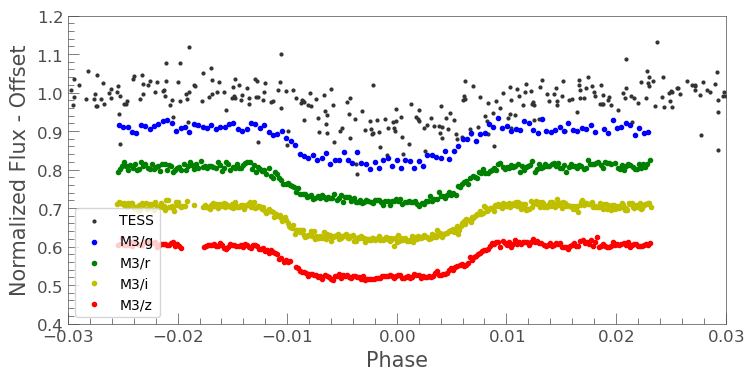

In [68]:
import matplotlib.pyplot as pl

bands = ['g','r','i','z']
colors = ['b', 'g', 'y', 'r']

ax = lc.fold(period, epoch_time=t0, normalize_phase=True).scatter(marker='o', label='TESS')
ax.set_xlim(-0.03, 0.03)

for i,b in enumerate(bands):
    df = data[b]

    phase = (df['BJD_TDB'] - tc)/period
    ax.scatter(phase, df['Flux']-0.1*i-0.1, marker='.', c=colors[i], label=f'M3/{b}')
ax.legend(loc=3)
ax.set_ylim(0.4, 1.2)
ax.set_ylabel('Normalized Flux - Offset')

In [66]:
savefig(ax.figure, '../figures/all_lcs.png', dpi=300, writepdf=False)

2024-01-11T07:23:12.015879: made ../figures/all_lcs.png
